In [75]:
import numpy as np

L = []
index = 0 
for i in range(6):
    for j in range(i):
        L.append([i,j])
        index += 1        

H = np.zeros((index,index))
nb = index
epsilon = 0
U = 10000
t = 1.0
for p in range(nb):
    H[p,p] = 2*epsilon
    if L[p][0] // 2 == L[p][1] // 2 and L[p][0] % 2 != L[p][1] % 2:
       H[p,p] += U
    for q in range(nb):
       if L[p][0] == L[q][1] and L[p][1] % 2 == L[q][0] % 2 and L[p][1] // 2 != L[q][0] // 2 and  np.abs(L[p][1] - L[q][0]) == 2: 
           H[p,q] = t
           H[q,p] = t
       elif L[p][1] == L[q][1] and L[p][0] % 2 == L[q][0] % 2 and L[p][0] // 2 != L[q][0] // 2 and np.abs(L[p][0] - L[q][0]) == 2:     
           H[p,q] = -t 
       elif L[p][0] == L[q][0] and L[p][1] % 2 == L[q][1] % 2 and L[p][1] // 2 != L[q][1] // 2 and np.abs(L[p][1] - L[q][1]) == 2:    
           H[p,q] = -t
H 

array([[ 1.e+04,  0.e+00,  1.e+00, -1.e+00,  0.e+00,  0.e+00,  0.e+00,
         0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,
         0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+00,
         0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,
         0.e+00],
       [ 1.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  1.e+00,  0.e+00,
        -1.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,
         0.e+00],
       [-1.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+00,  0.e+00,
         0.e+00,  0.e+00,  0.e+00, -1.e+00,  0.e+00,  0.e+00,  0.e+00,
         0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,
         0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+00,  0.e+00,  0.e+00,
         0.e+00],
       [ 0.e+00,  0.e+00,  1.e+00, -1.e+00,  0.e+00,  1.e+04,  0.e+00,
         0.e+00,  0.e+00,  1.e+00,  0.e+00,  0.e+00, -1.e+00,  0.e+00,
         0.e+00],
       [ 0.e+00, -1.e+00,  0.e+00,  0.e+

In [ ]:
H

In [76]:
from numpy import linalg as LA
evals,evects = LA.eigh(H)

In [77]:
print(evals)

[-1.41451355e+00 -1.41421356e+00 -1.41421356e+00 -1.41421356e+00
 -1.99999996e-04 -5.70244496e-14 -1.47364668e-16  9.44392914e-13
  1.41391355e+00  1.41421356e+00  1.41421356e+00  1.41421356e+00
  1.00000000e+04  1.00000002e+04  1.00000006e+04]


In [78]:
print(evects[:,0])

[-7.07081738e-05 -1.11429976e-10  3.53590878e-01 -3.53590878e-01
 -1.11022302e-16 -1.41416348e-04 -1.57485535e-10  4.99946964e-01
 -1.11335472e-10  3.53590878e-01 -4.99946964e-01 -1.43249765e-16
 -3.53590878e-01 -1.01271400e-16 -7.07081738e-05]


In [27]:
import matplotlib.pyplot as plt

In [79]:
V = np.zeros((6,6))
X = evects[:,0]

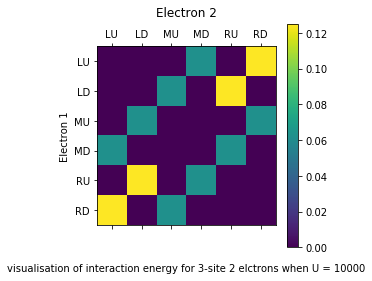

In [82]:
plt.matshow(V,cmap = "viridis")
X = (0,1,2,3,4,5)
Y = (0,1,2,3,4,5)
my_Xlabels = ["LU", "LD","MU", "MD", "RU", "RD"]
my_ylabels = ["LU", "LD","MU", "MD", "RU", "RD",]
plt.xticks(X, my_Xlabels)
plt.yticks(Y, my_ylabels)
plt.xlabel('\n\n\nvisualisation of interaction energy for 3-site 2 elctrons when U = 10000')
plt.ylabel("Electron 1")
plt.title( "Electron 2\n")
plt.colorbar()

In [80]:
X

array([-7.07081738e-05, -1.11429976e-10,  3.53590878e-01, -3.53590878e-01,
       -1.11022302e-16, -1.41416348e-04, -1.57485535e-10,  4.99946964e-01,
       -1.11335472e-10,  3.53590878e-01, -4.99946964e-01, -1.43249765e-16,
       -3.53590878e-01, -1.01271400e-16, -7.07081738e-05])

In [81]:
Psum = 0.0
for i in range(15):
    P = 0.5*((np.abs(X[i]))**2)
    Psum += P
    V[tuple(L[i])] += P
    V[tuple(reversed(tuple(L[i])))] += P
    

In [83]:
V

array([[0.00000000e+00, 2.49982292e-09, 6.20831982e-21, 6.25132544e-02,
        1.24008469e-20, 1.24973483e-01],
       [2.49982292e-09, 0.00000000e+00, 6.25132546e-02, 6.16297582e-33,
        1.24973484e-01, 1.02602476e-32],
       [6.20831982e-21, 6.25132546e-02, 0.00000000e+00, 9.99929169e-09,
        6.19779364e-21, 6.25132544e-02],
       [6.25132544e-02, 6.16297582e-33, 9.99929169e-09, 0.00000000e+00,
        6.25132546e-02, 5.12794819e-33],
       [1.24008469e-20, 1.24973484e-01, 6.19779364e-21, 6.25132546e-02,
        0.00000000e+00, 2.49982292e-09],
       [1.24973483e-01, 1.02602476e-32, 6.25132544e-02, 5.12794819e-33,
        2.49982292e-09, 0.00000000e+00]])